In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
m=np.zeros((16,16),dtype=int)
for i in range(16):
    m[i,(i+1)%16]=1
    m[(i+1)%16,i]=1
e=((1,6),(1,12),(2,10),(2,13),(3,7),(3,15),(4,9),(4,12))
d=(-1,3,7,11)
for X,Y in e:
    for j in d:
        m[(X+j)%16,(Y+j)%16]=1

In [3]:
rs=[[[]for j in range(16)]for i in range(16)]
for b in range(16):
    s=set(range(16))
    s.remove(b)
    r=[[b]]
    while s:
        t=r.copy()
        ns=set()
        r=[]
        for i in t:
            l=i[-1]
            for j in range(16):
                if m[l][j] and j in s:
                    rs[b][j].append(i+[j])
                    r.append(i+[j])
                    ns.add(j)
        s=s.difference(ns)
for i in range(1):
    t=rs[i]
    for j in range(i+1,16):
        print((i+1,j+1),*map(lambda x:[y+1 for y in x],t[j]),sep='\t')

(1, 2)	[1, 2]
(1, 3)	[1, 2, 3]
(1, 4)	[1, 12, 4]
(1, 5)	[1, 6, 5]	[1, 16, 5]
(1, 6)	[1, 6]
(1, 7)	[1, 6, 7]
(1, 8)	[1, 16, 8]
(1, 9)	[1, 2, 10, 9]	[1, 6, 14, 9]	[1, 12, 4, 9]	[1, 16, 8, 9]
(1, 10)	[1, 2, 10]
(1, 11)	[1, 12, 11]
(1, 12)	[1, 12]
(1, 13)	[1, 2, 13]	[1, 12, 13]
(1, 14)	[1, 6, 14]
(1, 15)	[1, 16, 15]
(1, 16)	[1, 16]


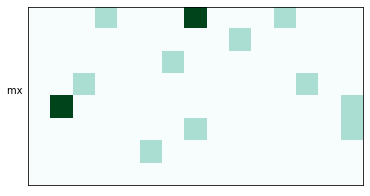

In [4]:
ps=[]
for i in range(16):
    t=rs[i]
    for j in range(i+1,16):
        ps.append(t[j])
mx=[len(p)for p in ps]+[2]
plt.imshow(np.array(mx[:-1]).reshape(8,15),cmap='BuGn')
plt.xticks([])
plt.yticks([])
plt.ylabel('mx      ',rotation=0)
plt.show()


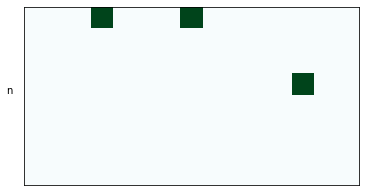

6
6 6 6 6 5 6 6 6 5 6 5 6 4 6 5 6


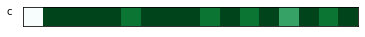

In [5]:
n=[0 for x in range(121)]
ans=99999
while not n[-1]:
    c=[0 for x in range(16)]
    for i in range(120):
        for j in ps[i][n[i]][1:-1]:
            c[j]+=1
    if max(c)<ans:
        ans=max(c)
        ansn=n.copy()
    n[0]+=1
    i=0
    while n[i]>=mx[i]:
        n[i]=0
        i+=1
        n[i]+=1
plt.imshow(np.array(ansn[:-1]).reshape(8,15),cmap='BuGn')
plt.xticks([])
plt.yticks([])
plt.ylabel('n      ',rotation=0)
plt.show()
c=[0 for x in range(16)]
for i in range(120):
    for j in ps[i][ansn[i]][1:-1]:
        c[j]+=1
print(ans)
print(*c)
plt.imshow(np.array([0]+c).reshape(1,17),cmap='BuGn')
plt.xticks([])
plt.yticks([])
plt.ylabel('c      ',rotation=0)
plt.show()